## Chapter4. 분류 

### 01. 분류(Classification)의 개요 

지도학습은 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식.

지도학습의 대표적인 유형인 **분류**는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것. 

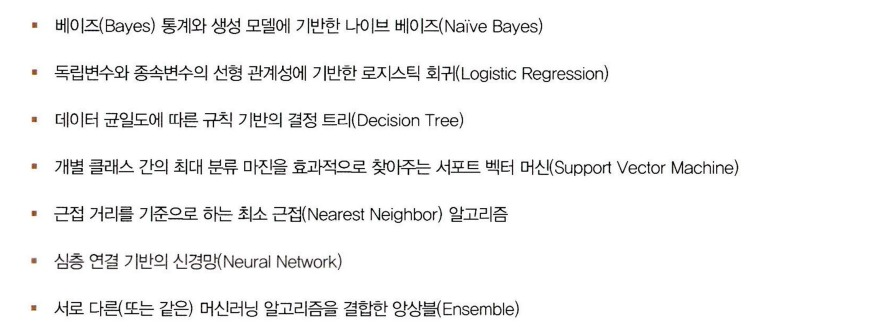

이번 장에서는 앙상블 방법을 집중적으로 다룸.

정형 데이터의 예측 분석 영역에서는 앙상블이 예측 성능이 매우 높게 나타남. 

**[앙상블]**

일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨.

배깅 방식의 대표인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가 애용하는 알고리즘. 

하지만, 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전하고 있음. 
 - 부스팅의 효시인 그래디언트 부스팅은 뛰어난 예측 성능을 가지고 있지만 수행시간이 너무 오래 걸려 최적화 모델 튜닝이 어려웠음.
 - XgBoost와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡음. 

-------------------------------------------
앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정트리. 

결정트리는 매우 쉽고 유연하고 사전가공의 영향이 매우 적음. 

하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생해 예측 성능이 저하될 수도 있다는 단점이 있음. 

### 02. 결정트리 

결정트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘. 

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리기반의 분류 규칙을 만드는 것.

일반적으로 if/else 기반으로 나타냄. if,else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘. 

데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함. 

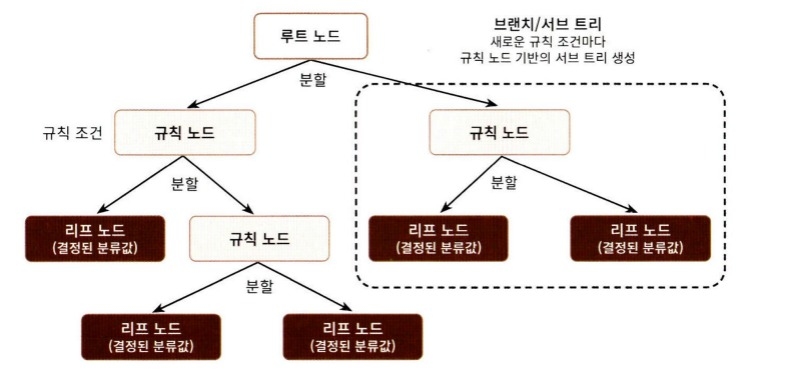

규칙 노드(Desicion Node)로 표시된 노드는 규칙 조건이 되는 것. 
리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값. 

새로운 규칙 조건마다 서브트리가 생성. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙조건을 만들 때마다 규칙노드가 만들어짐. 

하지만, 규칙이 많다는 것은 분류를 결정하는 방식이 복잡해진다는 얘기이고, 이는 과적합으로 이어지기 쉬움. 즉, 트리의 깊이가 깊어질수록 결정트리의 예측성능이 저하될 가능성이 높음. 

**=> 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함.**

------------------------------------------------------
최대한 균일한 데이터 세트를 구성할 수 있도록 트리를 분할하는 것이 필요. 

-> 정보균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 이 서브 데이터 세트에서 균일도가 높은 자식데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측. 

=> 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보이득지수와 지니계수가 있음.

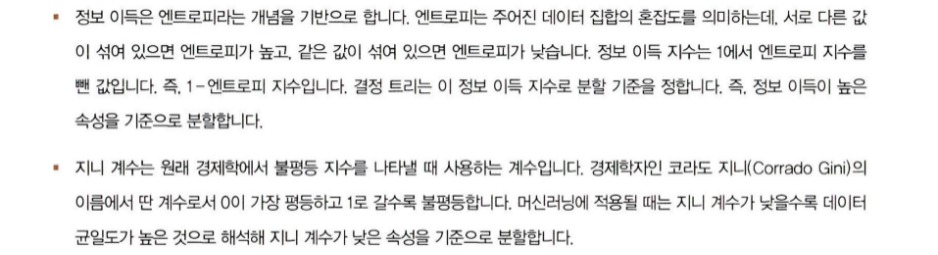

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니계수를 이용해 데이터 세트를 분할. 

결정 트리의 일반적인 알고리즘은 정보이득이 높거나 지니계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함. 

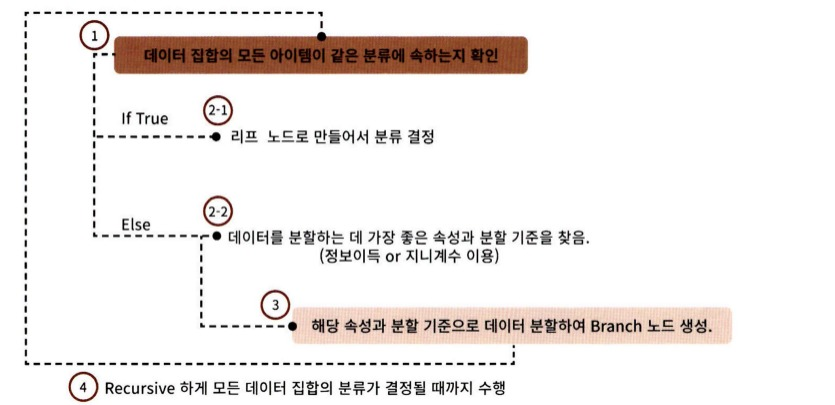

**[결정 트리 모델의 특징]**

: 결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점. 

정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 전처리 작업이 필요없음. 

: 결정트리 모델의 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없음. 

**[결정 트리 파라미터]**

 : 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공.
 - DecisionTreeClassifier는 분류를 위한 클래스.
 - DecisionTreeRegressor는 회귀르리 위한 클래스.
 
: 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반.
 
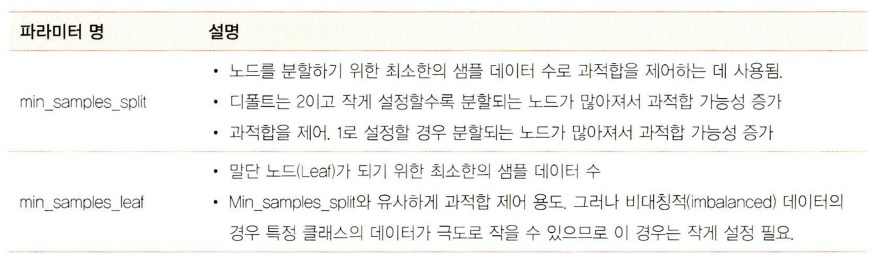

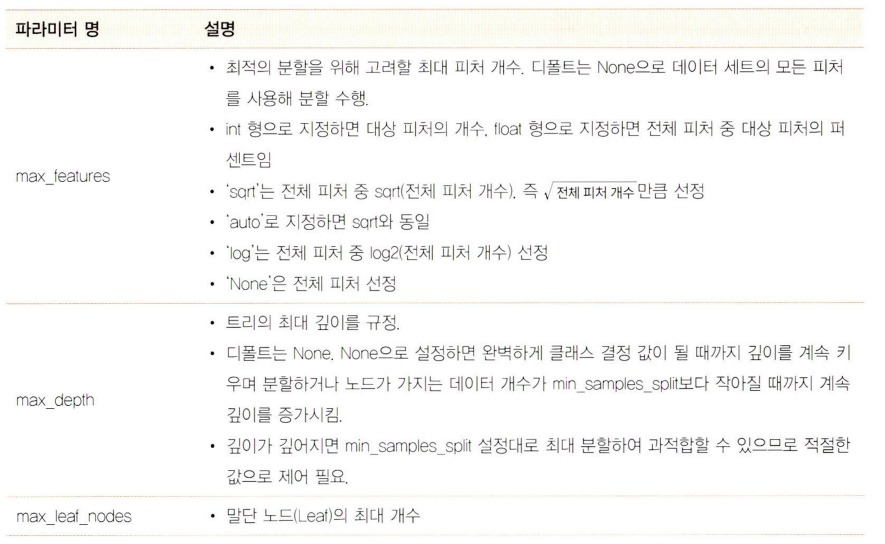

**[결정 트리 모델의 시각화]**

: Graphviz패키지를 사용하면 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있음. 
 - 사이킷런은 이러한 Graphviz패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공.
 - export_graphviz()는 함수인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화.

: Grapghviz는 파이썬으로 개발된 패키지가 아니기 때문에 별도로 설치해 주어야 함. 

-----------------------
붓꽃 데이터 세트에 결정트리를 적용할 때 어떻게 서브트리가 구성되고 만들어지는지 시각화.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)


C:\Users\june0\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


DecisionTreeClassifier(random_state=156)

 - export_graphviz()는 Graphviz가 읽어들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성.
 - 인자로 학습이 완료된 estimator, output 파일명, 결정 클래스의 명칭, 피처의 명칭을 입력해줌. 

In [2]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

생성된 출력파일 'tree.dot'을 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있음. 

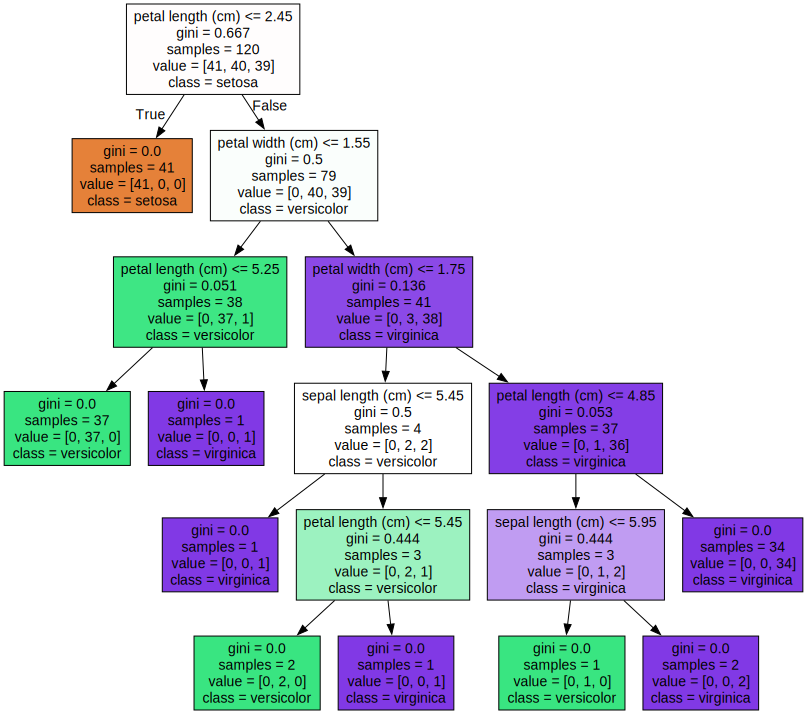

In [3]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<트리 결과>
1. 더이상 자식 노드가 없는 노드는 리프 노드. 리프 노드는 최종 클래스 값이 결정되는 노드./ 자식 노드가 있는 노드는 브랜치 노드이며 자식노드를 만들기 위한 분할 규칙 조건을 가지고 있음. 
 - petal length(cm) <=2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙조건. 이 조건이 없으면 리프 노드
 - gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니계수.
 - samples는 현규칙에 해당하는 데이터 건수
 - value=[]는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며, 만일 value=[41,40,39]라면 클래스 값의 순서로 0 41개, 1 40개, 2 39개로 데이터가 구성되어 있다는 의미.


2.
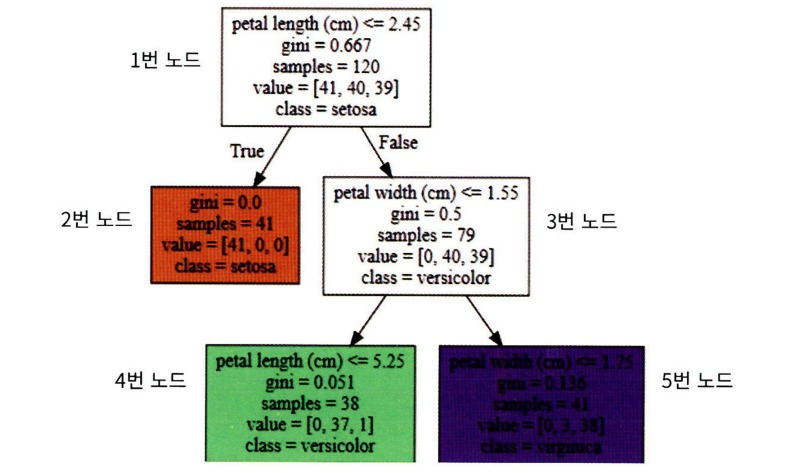

[1번 노드]

sample120개가 value=[41,40,39] 분포도로 되어 있으므로 지니계수는 0.667.

class=setosa는 하위노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미.

[2번 노드]

모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프노드. 

[3번 노드]

지니계수가 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요.

petal width <= 1.55규칙으로 자식 노드 생성.

[4번 노드]

지니계수는 0.051로 매우 낮으나 여전히 데이터가 혼재되어 있으므로 petal width <=1.75라는 새로운 규칙으로 다시 자식 노드 생성.

=> 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미. 새깔이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미.

3. 결정트리는 규칙 생성로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리노드를 계속해서 만들어 감. -> 이로 인해 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합.

-> 결정트리 알고리즘의 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도.

 - max_depth : 결정 트리의 최대 트리 깊이를 제어.
 - min_samples_split : 자식노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수. min_samples_splits=4일때, value=[0,2,1]이라면 샘플이 3개이므로 더이상 분할을 하지 않음. 
 - min_samples_leaf : 더이상 자식노드가 없는 리프노드는 클래스 결정값이 됨. 이 리프노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정.
     - 결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 조건. 
     - 사이킷런은 결정 트리 알고리즘이 학습으 ㄹ통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier객체의 feature_importances_속성으로 제공.
     - feature_importances_는 ndarray형태로 값을 반환하며 피처 순서대로 값이 할당. 

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025005
sepal width (cm):0.000000
petal length (cm):0.554903
petal width (cm):0.420092


<AxesSubplot:>

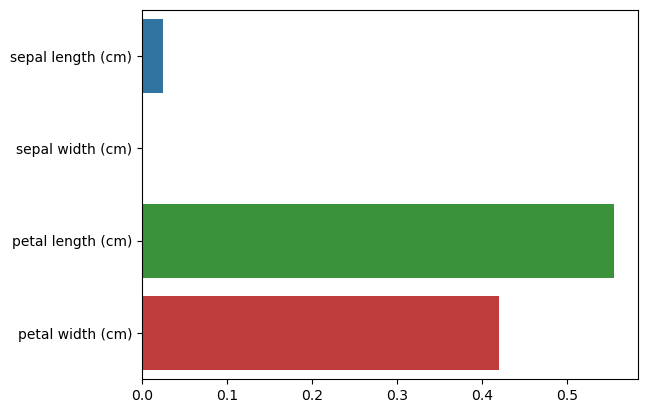

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:3f}'.format(name,value))
    
#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

**[결정 트리 과적합(Overfitting)]**

: 결정트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보자.

사이킷런의 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공. make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트.

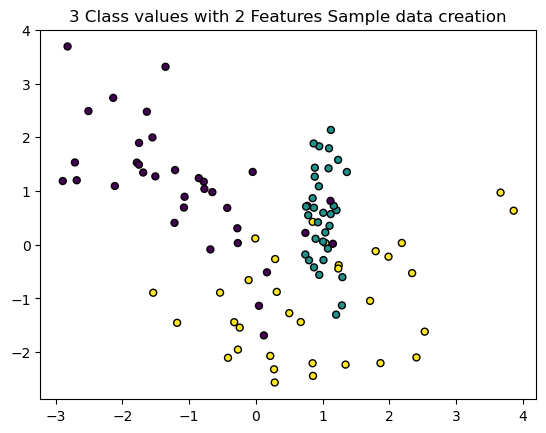

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클리스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

X_features와 y_labels 데이터 세트를 기반으로 결정 트리를 학습.

**1. 첫번째 학습시**에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인.
 - visualize_boundary() : 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 알려줌. 

In [6]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터를 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

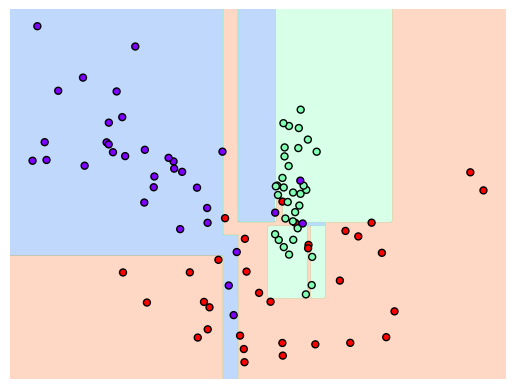

In [7]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

**2.min_samples_leaf=6**을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화.

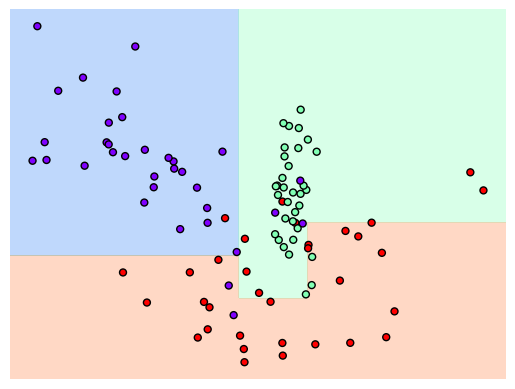

In [8]:
#min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있음. 

**[결정트리실습 - 사용자 행동 인식 데이터 세트]**

 : 결정트리를 이용해 UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터 세트에 대한 예측 분류를 수행.
 
 : 해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리. 이를 Dataframe으로 로드
feature_name_df = pd.read_csv('C:/data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


 - 피처명을 가지고 있는 features_info.txt 파일은 중복된 피처명을 가지고 있음. 
 
-> 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 변경.

In [10]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


 - get_new_feature_name_df() : 중복된 피처명에 _1또는 _2를 추가하여 새로운 피처명을 가지는 Dataframe을 반환.

In [14]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

 - train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 하ㅏㄱ습/테스트용 Dataframe에 로드.: get_human_dataset()

In [15]:
import pandas as pd
import numpy as np

def get_human_dataset():
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/data/human_activity/features.txt', sep='\s+', 
                                 header=None, names=['column_index','column_name'])
    #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 Dataframe새엇ㅇ
    new_feature_name_df= get_new_feature_name_df(feature_name_df)
    
    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    #학습 피터 데이터세트와 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('C:/data/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('C:/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('C:/data/human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('C:/data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    #로드된 학습/테스트용 DataFrame을 모두 변환
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = get_human_dataset()

In [16]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습데이터 세트는 7532개의 레코드로 561개의 피처를 가지고 있음. 

In [17]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


 - DecisionTreeClassifier 를 이용해 동작 예측 분류를 수행함. 하이퍼 파라미터는 모두 디폴트 값으로 설정.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.854768
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


 - 결정트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴봄.리프노드가 될 수 있는 적합한 수준이 될 떄까지 지속해서 트리의 분할을 수행하면서 깊이가 깊어짐. 

GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터 max_depth값을 변화시키면서 예측성능을 확인.

In [22]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.851344
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


 - max_depth값의 증가에 따라 예측 성능이 어떻게 변했는지 확인 
 : cv_results_속성을 통해 살펴봄.하이퍼 파라미터를 순차적으로 입력했을때의 성능수치.

In [23]:
#GridSearchCV 객체의 cv_results_속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


 - 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정함. max_depth의 변화에 따른 값을 측정함. 

In [25]:
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth={0} 정확도: {1:4f}'.format(depth,accuracy))

max_depth=6 정확도: 0.855786
max_depth=8 정확도: 0.870716
max_depth=10 정확도: 0.867323
max_depth=12 정확도: 0.864608
max_depth=16 정확도: 0.857482
max_depth=20 정확도: 0.854768
max_depth=24 정확도: 0.854768


max_depth와 min_samples_split을 변경하면서 정확도 성능을 튜닝.

In [26]:
params = {'max_depth':[8,12,16,20], 'min_samples_split':[16,24],}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GRidSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.854879
GRidSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [27]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:4f}'.format(accuracy))

결정 트리 예측 정확도:0.871734


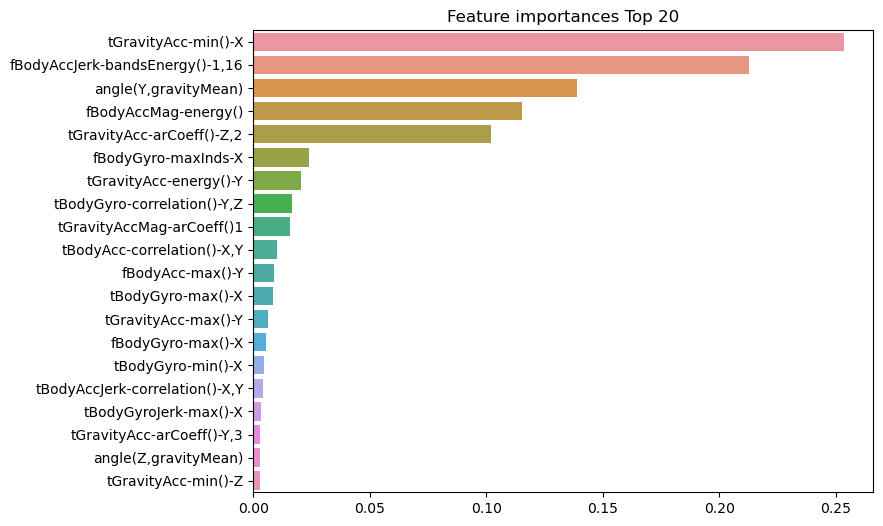

In [28]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
#Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns )

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()